**Submission Dicoding**

**Proyek Akhir : Image Classification Model Deployment**

Ita Sulistiani / itasulis16@gmail.com

username : haru.haruru_

In [1]:
# install package untuk kaggle

!pip install -q kaggle

In [2]:
# upload file kredensial kaggle.json

from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"itasulistiani","key":"37ebf60897a6a643775b64e4303c7e94"}'}

In [3]:
# membuat direktori dan merubah izin

!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle
!chmod 600 ~/.kaggle/kaggle.json
!ls ~/.kaggle

kaggle.json


In [4]:
# download dataset

!kaggle datasets download -d puneet6060/intel-image-classification

 96% 331M/346M [00:02<00:00, 135MB/s]
100% 346M/346M [00:02<00:00, 136MB/s]


In [5]:
# ekstraksi file

!mkdir intel
!unzip intel-image-classification.zip -d intel
!ls intel

Output streaming akan dipotong hingga 5000 baris terakhir.
  inflating: intel/seg_train/seg_train/mountain/7537.jpg  
  inflating: intel/seg_train/seg_train/mountain/7539.jpg  
  inflating: intel/seg_train/seg_train/mountain/7551.jpg  
  inflating: intel/seg_train/seg_train/mountain/7560.jpg  
  inflating: intel/seg_train/seg_train/mountain/7565.jpg  
  inflating: intel/seg_train/seg_train/mountain/7578.jpg  
  inflating: intel/seg_train/seg_train/mountain/7581.jpg  
  inflating: intel/seg_train/seg_train/mountain/7586.jpg  
  inflating: intel/seg_train/seg_train/mountain/7647.jpg  
  inflating: intel/seg_train/seg_train/mountain/7652.jpg  
  inflating: intel/seg_train/seg_train/mountain/7654.jpg  
  inflating: intel/seg_train/seg_train/mountain/7662.jpg  
  inflating: intel/seg_train/seg_train/mountain/767.jpg  
  inflating: intel/seg_train/seg_train/mountain/7672.jpg  
  inflating: intel/seg_train/seg_train/mountain/7679.jpg  
  inflating: intel/seg_train/seg_train/mountain/7681.jpg 

In [6]:
# path direktori

import os

base_dir = base_dir = '/content/intel'
train_dir = os.path.join(base_dir, 'seg_train', 'seg_train')
test_dir = os.path.join(base_dir, 'seg_test', 'seg_test')

In [7]:
# path direktori training
train_mountain_dir = os.path.join(train_dir, 'mountain')
train_street_dir = os.path.join(train_dir, 'street')
train_buildings_dir = os.path.join(train_dir, 'buildings')
train_sea_dir = os.path.join(train_dir, 'sea')
train_forest_dir = os.path.join(train_dir, 'forest')
train_glacier_dir = os.path.join(train_dir, 'glacier')

In [8]:
# kelas
classes = ('buildings', 'forest', 'glacier', 'mountain', 'sea', 'street')
num_classes = len(classes)

Found 14034 files belonging to 6 classes.


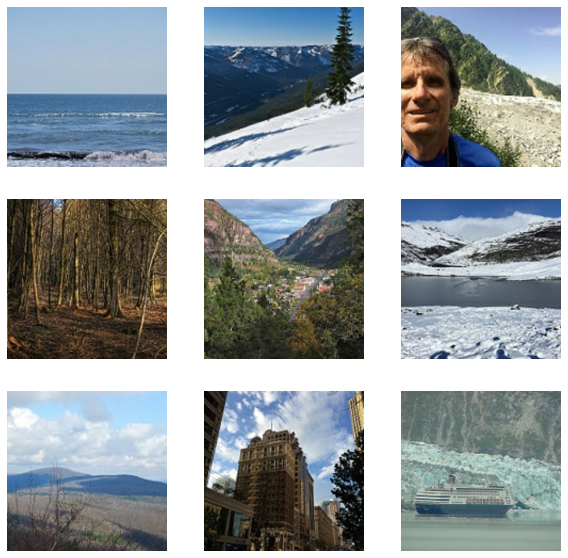

In [29]:
# melihat sampel data

import tensorflow as tf
import matplotlib.pyplot as plt
import numpy
import random

df = tf.keras.preprocessing.image_dataset_from_directory(train_dir)
# for i in range(9):
#   rand_class = random.randint(0, 10)

plt.figure(figsize=(10, 10))
for images, labels in df.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i+1)
    plt.imshow(images[i].numpy().astype('uint8'))
    plt.axis('off')

In [30]:
# menentukan jumlah batch dan size input

batch_size = 64
input_size = (150, 150)
input_size_C = (150, 150, 3)

In [31]:
# augmentasi gambar

from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1/255.,
                                   rotation_range = 20,
                                   width_shift_range = 0.2,
                                   height_shift_range = 0.2,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

validation_datagen = ImageDataGenerator(rescale = 1/255.)

In [32]:
# train dan validation generator

train_generator = train_datagen.flow_from_directory(train_dir,
                                                    batch_size = batch_size,
                                                    class_mode = 'categorical',
                                                    target_size = input_size)

validation_generator = train_datagen.flow_from_directory(test_dir,
                                                         batch_size = batch_size,
                                                         class_mode = 'categorical',
                                                         target_size = input_size)

Found 14034 images belonging to 6 classes.
Found 3000 images belonging to 6 classes.


In [34]:
# arsitektur model

model = tf.keras.models.Sequential([
                                    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape = input_size_C),
                                    tf.keras.layers.MaxPooling2D(2,2),
                                    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
                                    tf.keras.layers.MaxPooling2D(2,2),
                                    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
                                    tf.keras.layers.MaxPooling2D(2,2),
                                    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
                                    tf.keras.layers.MaxPooling2D(2,2),
                                    tf.keras.layers.Dropout(0.1),
                                    tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(1028, activation='relu'),
                                    tf.keras.layers.Dense(32, activation='relu'),
                                    tf.keras.layers.Dense(num_classes, activation='softmax')
])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 72, 72, 32)        4640      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 34, 34, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 17, 17, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 15, 15, 128)       7

In [35]:
# metode callback function untuk stop training jika akurasi telah di atas 90%

class Callback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy') > 0.90 and logs.get('val_accuracy') > 0.90):
      self.model.stop_training = True

stop_training = Callback()

In [37]:
# compile model

model.compile(loss='categorical_crossentropy',
              optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001),
              metrics = ['accuracy'])

In [38]:
# training model

history = model.fit(train_generator,
                    epochs = 50,
                    batch_size = batch_size,
                    validation_data = validation_generator,
                    callbacks = [stop_training])

Epoch 1/50
220/220 [==============================] - 425s 2s/step - loss: 1.2074 - accuracy: 0.5140 - val_loss: 0.9703 - val_accuracy: 0.6383
Epoch 2/50
220/220 [==============================] - 420s 2s/step - loss: 0.9208 - accuracy: 0.6464 - val_loss: 0.8604 - val_accuracy: 0.6730
Epoch 3/50
220/220 [==============================] - 422s 2s/step - loss: 0.7990 - accuracy: 0.7019 - val_loss: 0.7213 - val_accuracy: 0.7253
Epoch 4/50
220/220 [==============================] - 424s 2s/step - loss: 0.7062 - accuracy: 0.7428 - val_loss: 0.6953 - val_accuracy: 0.7557
Epoch 5/50
220/220 [==============================] - 425s 2s/step - loss: 0.6577 - accuracy: 0.7579 - val_loss: 0.6347 - val_accuracy: 0.7717
Epoch 6/50
220/220 [==============================] - 425s 2s/step - loss: 0.6096 - accuracy: 0.7763 - val_loss: 0.6054 - val_accuracy: 0.7823
Epoch 7/50
220/220 [==============================] - 422s 2s/step - loss: 0.5786 - accuracy: 0.7908 - val_loss: 0.5768 - val_accuracy: 0.7830

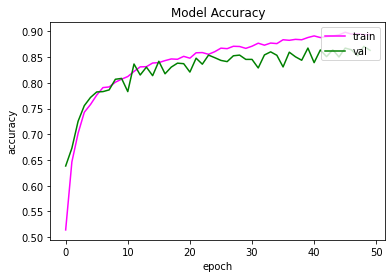

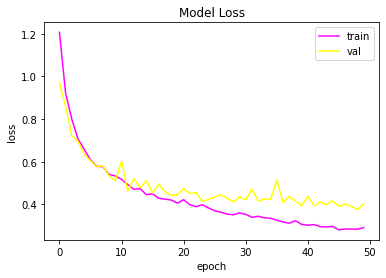

In [39]:
# visualisasi training model

import matplotlib.pyplot as plt

accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.plot(accuracy, color = 'magenta')
plt.plot(val_accuracy, color = 'green')
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc = 'upper right')
plt.show()

plt.plot(loss, color = 'magenta')
plt.plot(val_loss, color = 'yellow')
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper right')
plt.show()

In [41]:
# menulis kode untuk menyimpan model ke dalam format TF-Lite

converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

with tf.io.gfile.GFile('model.tflite', 'wb') as f:
  f.write(tflite_model)

INFO:tensorflow:Assets written to: /tmp/tmppk7ys3xg/assets


In [42]:
!ls -la | grep 'model'

-rw-r--r-- 1 root root  26321876 Jul  8 06:25 model.tflite
